In [335]:
import yfinance as yf

# Import pandas
import pandas as pd

# Download the datafile from yfinance
data = yf.download("BTC-USD", start="2018-01-01", end="2022-03-28")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2017-12-31,14156.4
2018-01-01,13657.2
2018-01-02,14982.1
2018-01-03,15201.0
2018-01-04,15599.2


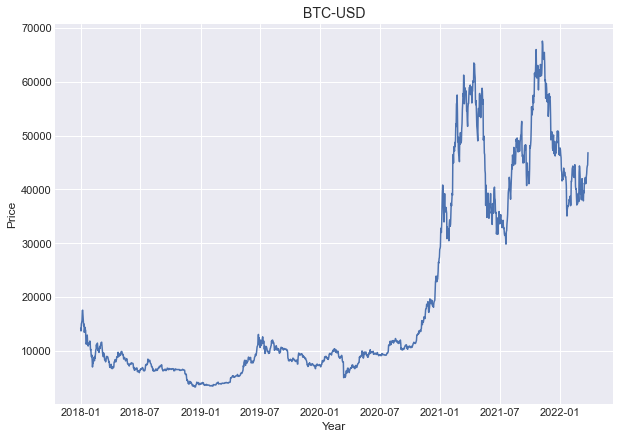

In [336]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot the time series
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('BTC-USD', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [337]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -0.75
5% Critical Value: -2.86
p-value: 0.83


as p value is bigger than 0.05 so we fail to reject the null-hypothesis, which means that the time series is not stationary

In [338]:
from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(4.4354846581400516, 0.01, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 4.44
5% Critical Value: 0.46
p-value: 0.01


C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Both tests conclude that the series is not stationary - The series is not stationary

<ipython-input-339-148ae42b8090>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data, model='additive', freq=1)


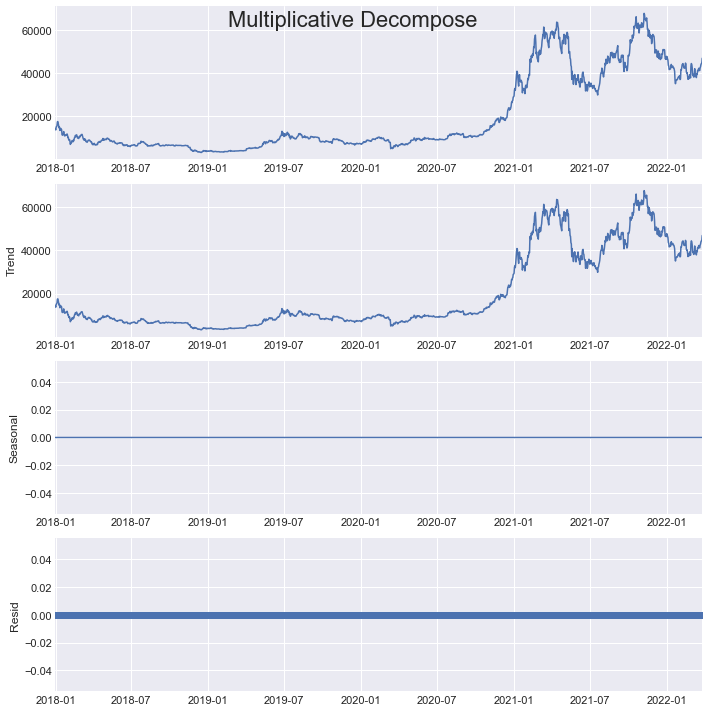

In [339]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive', freq=1)
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Multiplicative Decompose', fontsize=22)

plt.show()

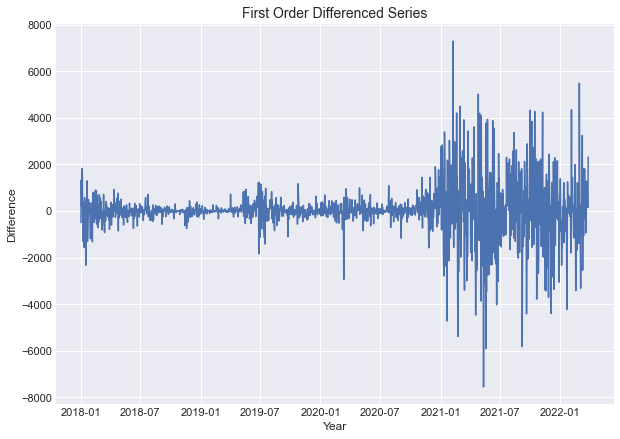

In [340]:
data_diff = data.copy()
data_diff['Difference'] = data_diff['Close'].diff()
data_diff.dropna(inplace = True)
data_diff.drop("Close", axis = 1, inplace = True)

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data_diff['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [341]:
result = adfuller(data_diff.Difference)
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-7.511628272056914, 4.0014185608130344e-11, 23, 1523, {'1%': -3.4346509559508043, '5%': -2.8634396042688914, '10%': -2.5677813226435195}, 25445.04213419056)
ADF Test Statistic: -7.51
5% Critical Value: -2.86
p-value: 0.00


In [342]:
result = kpss(data_diff.Difference)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(0.15384805154551903, 0.1, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 0.15
5% Critical Value: 0.46
p-value: 0.10


C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests conclude that the series (difference) is stationary - The series is stationary

ACF & PACF

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


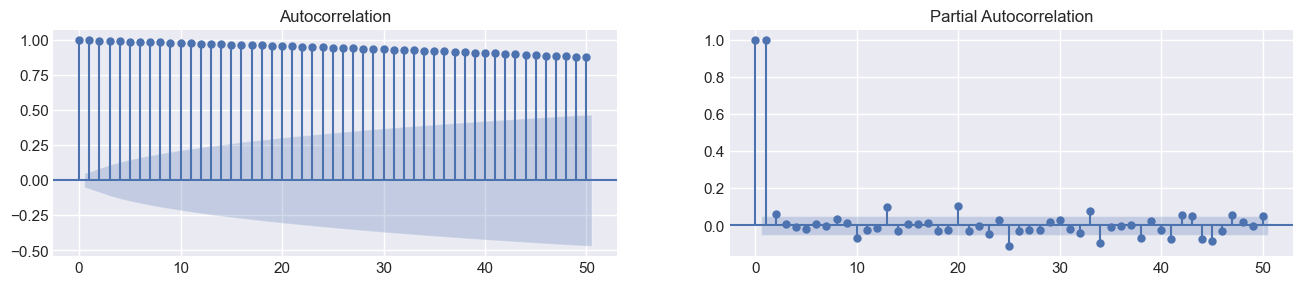

In [343]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
acf_50 = acf(data.Close, nlags=50)
pacf_50 = pacf(data.Close, nlags=50)

# Draw Plots
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(data.Close.tolist(), lags=50, ax=axes[1])

plt.show()

MA models 

In [344]:
from statsmodels.tsa.arima.model import ARIMA
ma1 = ARIMA(data_diff, order = (0,0,1))
result_ma1 = ma1.fit()

ma2 = ARIMA(data_diff, order = (0,0,2))
result_ma2 = ma2.fit()

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3

AR2

In [345]:
ar2 = ARIMA(data_diff, order = (2,0,0))
results_ar2 = ar2.fit()
print(results_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:             Difference   No. Observations:                 1547
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -12932.992
Date:                Tue, 29 Mar 2022   AIC                          25873.983
Time:                        15:55:30   BIC                          25895.360
Sample:                    01-01-2018   HQIC                         25881.934
                         - 03-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1145     25.872      0.816      0.414     -29.594      71.823
ar.L1         -0.0293      0.017     -1.744      0.081      -0.062       0.004
ar.L2         -0.0017      0.016     -0.107      0.9

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it


ARMA(2,2)

In [346]:
arma22 = ARIMA(data_diff, order = (2,0,2))
results_arma22 = arma22.fit()

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


ARIMA

In [347]:
arima212 = ARIMA(data, order = (0,1,0))
results_arima212 = arima212.fit()

C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\gixi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # If an index is available, see if it is a date-based index or if it


In [348]:
models_name = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [result_ma1,result_ma2,results_ar2,results_arma22,results_arima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models_name)):
    if i != 4:
        r = mean_squared_error(y_true = data_diff, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
    else:
        r = mean_squared_error(y_true = data, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
aic = []
for i in range(0, len(models_name)):
    if i != 4:
        a = results[i].aic
        aic.append(a)
    else:
         a= results[i].aic
         aic.append(a) 

In [349]:
results_rmse = list(zip(models_name,rmse))
summary = pd.DataFrame(results_rmse, columns=['models_name','rmse'])
summary['aic'] = aic
summary

,models_name,rmse,aic
0,MA1,1033.915425,25871.986716
1,MA2,1033.915422,25873.985404
2,AR2,1033.914711,25873.983288
3,ARMA,1027.825878,25860.488036
4,ARIMA,1095.040363,25869.957768


ARMA&ARIMA are the best models while ARIMA is a bit better

In [350]:
forecast = results_arima212.predict(start="2022-04-01", end="2022-08-30")

<ipython-input-351-83f7954c40b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data.index
<ipython-input-351-83f7954c40b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Close']
<ipython-input-351-83f7954c40b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

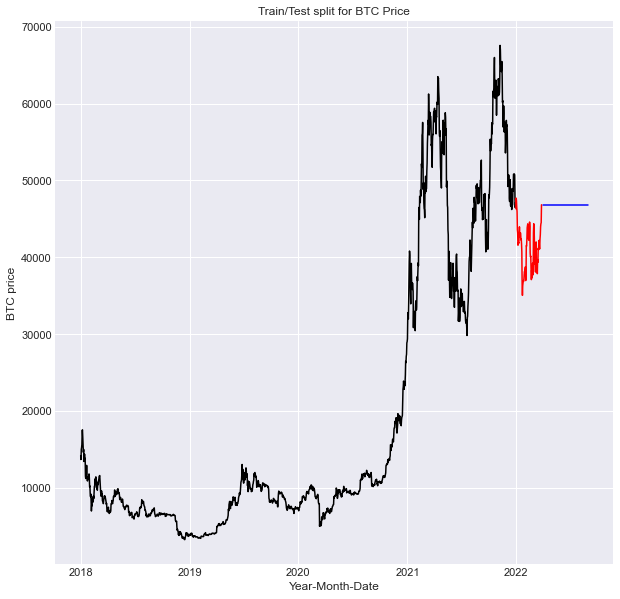

In [351]:
import seaborn as sns
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("2021-12-31",format='%Y-%m-%d')]
train['train'] = train['Close']
del train['Date']
del train['Close']
test = data.loc[data['Date'] >= pd.to_datetime("2021-12-31", format='%Y-%m-%d')]
del test['Date']
test['test'] = test['Close']
del test['Close']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = 'blue')
plt.title("Train/Test split for BTC Price")
plt.ylabel("BTC price")
plt.xlabel("Year-Month-Date")
sns.set()
plt.show()